In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde


# https://velog.io/@sirasony12/%EC%A7%80%EB%8F%84-%EC%8B%9C%EA%B0%81%ED%99%94

import folium
from folium import plugins

In [2]:
# !pip install folium

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
img = plt.imread("./data/koreamap2.png")

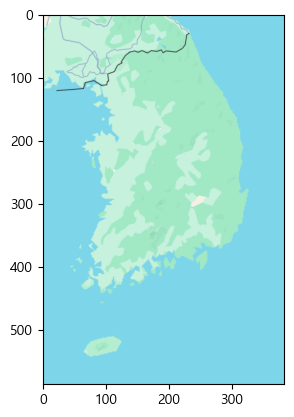

In [5]:
plt.imshow(img)

In [6]:
## img  32.915528, 125.520457    ~~~~   38.874711, 131.210536
### img2    32.817840, 125.369421  ~~~     38.930970, 130.334128

In [7]:
## percent

# 좌표 : 위도 : 35.14917699999961, 경도 : 126.91281599999981
# 주소 : 광주 동구 충장로4가 32-2

lat_test = [35.14917699999961, 126.91281599999981]
x_ = img.shape[1] * (lat_test[0] - 32.915528)/(38.874711 - 32.915528)
y_ = img.shape[0] * (1-((lat_test[1] - 125.369421)/(130.334128 - 125.369421)))
## to 

In [8]:
data = pd.read_csv("./data/sidoGuDong_latlng.csv")
data

,Unnamed: 0,시도,지역이름,법정동,avg,count,latitude,longitude
0,0,강원,강릉시,강동면 안인리,3249.090909,11,37.732929,128.976246
1,1,강원,강릉시,견소동,18091.992786,1109,37.772679,128.943061
2,2,강원,강릉시,교동,19930.917241,3770,37.767435,128.888073
3,3,강원,강릉시,금학동,17376.470588,17,37.753709,128.896388
4,4,강원,강릉시,남문동,16083.673469,98,37.749459,128.889471
...,...,...,...,...,...,...,...,...
3048,3048,충북,흥덕구,오송읍 오송리,11446.067416,89,36.607217,127.332320
3049,3049,충북,흥덕구,오송읍 정중리,9464.866667,60,36.624302,127.301493
3050,3050,충북,흥덕구,옥산면 가락리,21298.261318,1745,36.670489,127.384051
3051,3051,충북,흥덕구,옥산면 오산리,6120.660897,1271,36.663684,127.370450


In [9]:
lat_list = list(data['latitude'].values)
lng_list = list(data['longitude'].values)


In [10]:
x_ = img.shape[1] * (lat_test[0] - 32.915528)/(38.874711 - 32.915528)
y_ = img.shape[0] * (1-((lat_test[1] - 125.369421)/(130.334128 - 125.369421)))


In [11]:
# convert to float, to percentage

lat_list = list(data['latitude'].values)
lng_list = list(data['longitude'].values)
size_avg = list((data['avg']/1000).values)

for i in range(len(lat_list)) :
    
    lat_list[i] = (1-(float(lat_list[i]) - 32.915528)/(38.874711 - 32.915528)) * img.shape[0]
    lng_list[i] = img.shape[1] * ((float(lng_list[i]) - 125.369421)/(130.334128 - 125.369421))

    

In [12]:
img.shape

(587, 384, 4)

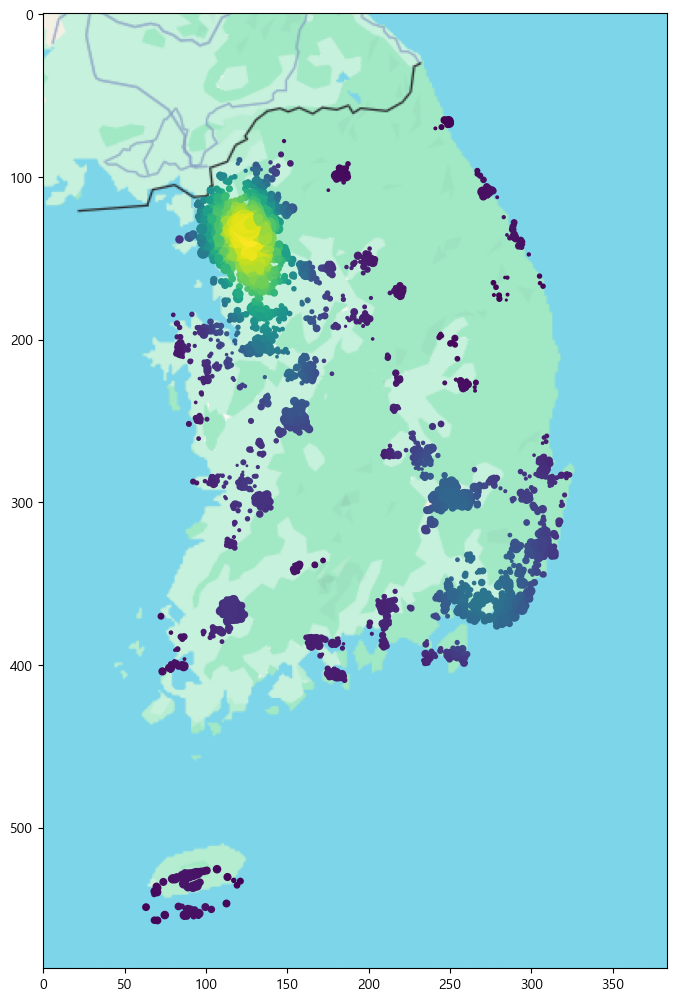

In [13]:
plt.figure(figsize = (10, 12.4))
plt.imshow(img)




xy = np.vstack([lat_list, lng_list])
z = gaussian_kde(xy)(xy)


plt.scatter(lng_list, lat_list, c=z, s=size_avg)
plt.show()


In [14]:
## image + scatterplot 은 조금 싱크도 어긋나고 잘 안되는거 같음. folium 사용하는걸로 변경